In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
img1 = cv2.imread("/content/l1.png",0)
img2 = cv2.imread("/content/r1.png",0)
print(img1.shape)
print(img2.shape)

(289, 382)
(289, 382)


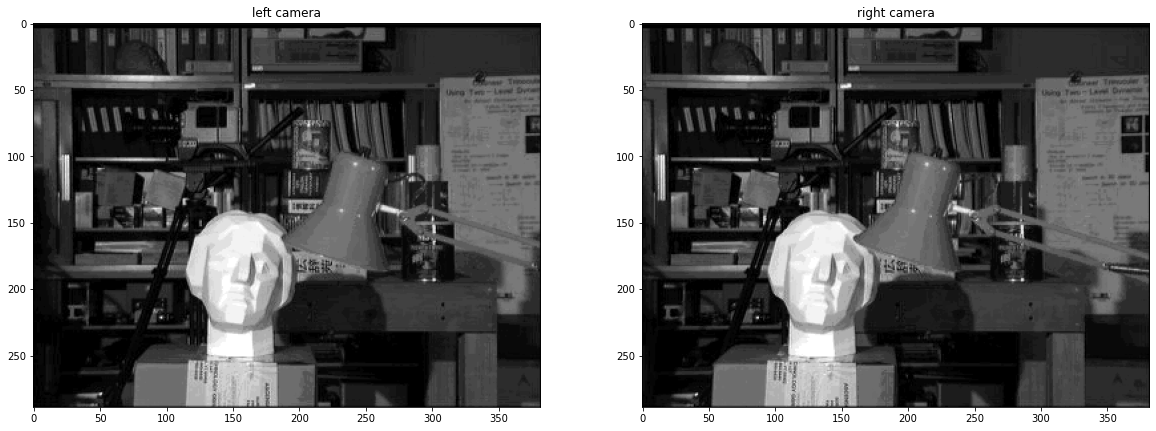

In [ ]:
def display_scene(img1,img2):
  fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,8))
  ax[0].imshow(img1,cmap='gray')
  ax[0].title.set_text("left camera")
  ax[1].imshow(img2,cmap='gray')
  ax[1].title.set_text("right camera")
display_scene(img1,img2)

# Block Matching

In [ ]:
def get_SAD(val,row_vals):
  return np.abs(row_vals - val)

In [ ]:
def get_SSD(val,row_vals):
  return np.square(row_vals-val)

In [ ]:
def visualize_disparity_maps(sad,ssd,k=1):
  fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,8))
  ax[0].imshow(sad,cmap='gray')
  ax[0].title.set_text(f"Using SAD with window size = {k}")
  ax[1].imshow(ssd,cmap='gray')
  ax[1].title.set_text(f"Using SSD with window size = {k}")

In [ ]:
def block_matching(img1,img2,k=1):
  ROWS,COLS = img1.shape
  sad_map = np.zeros(img1.shape)
  ssd_map = np.zeros(img1.shape)
  if k == 1:
    for i in range(ROWS):
      for j in range(COLS):
        sad_map[i][j] = j - np.argmin(get_SAD(img1[i][j],img2[i]))
        ssd_map[i][j] = j - np.argmin(get_SSD(img1[i][j],img2[i]))
  else:
    for i in range(k//2,ROWS-k//2):
      for j in range(k//2,COLS-k//2):
        left_window = img1[i-k//2:i+k//2 +1,j-k//2:j+k//2 + 1]
        sad = []
        ssd = []
        for c in range(k//2,COLS-k//2):
          right_window = img2[i-k//2:i+k//2 +1,c-k//2:c+k//2 + 1]
          sad.append(np.sum( np.abs( left_window - right_window )))
          ssd.append(np.sum( ( left_window - right_window ) ** 2 ))
        sad_map[i][j] = ((j-k//2) - np.argmin(sad)) * 255 / int( COLS / 8 )
        # ssd_map[i][j] = (j-k//2) - np.argmin(ssd)
        ssd_map[i][j] = ((j-k//2) - np.argmin(ssd)) * 255 / int( COLS / 8 )
  return sad_map,ssd_map

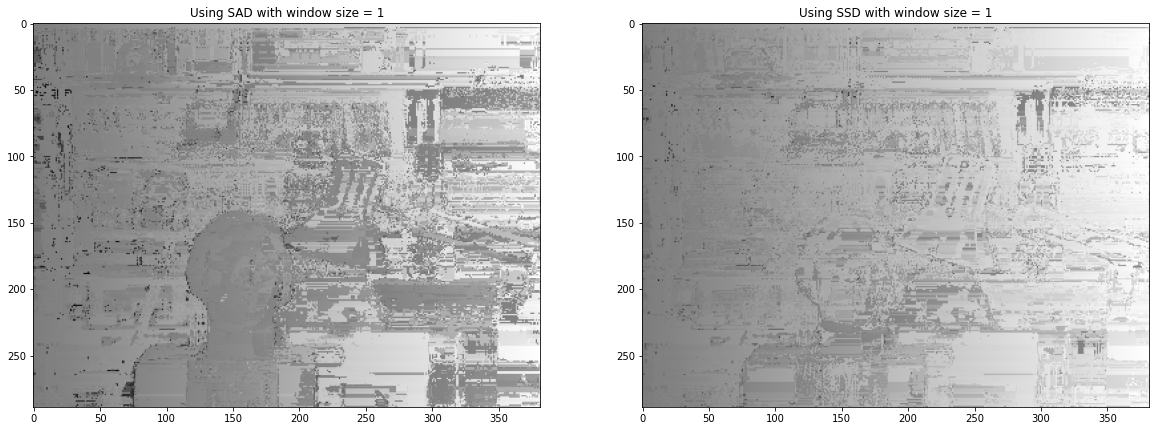

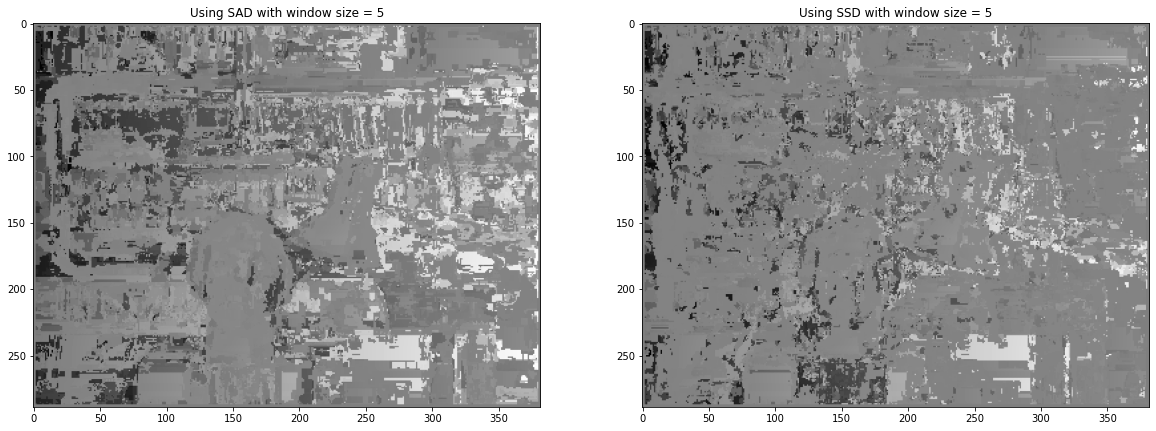

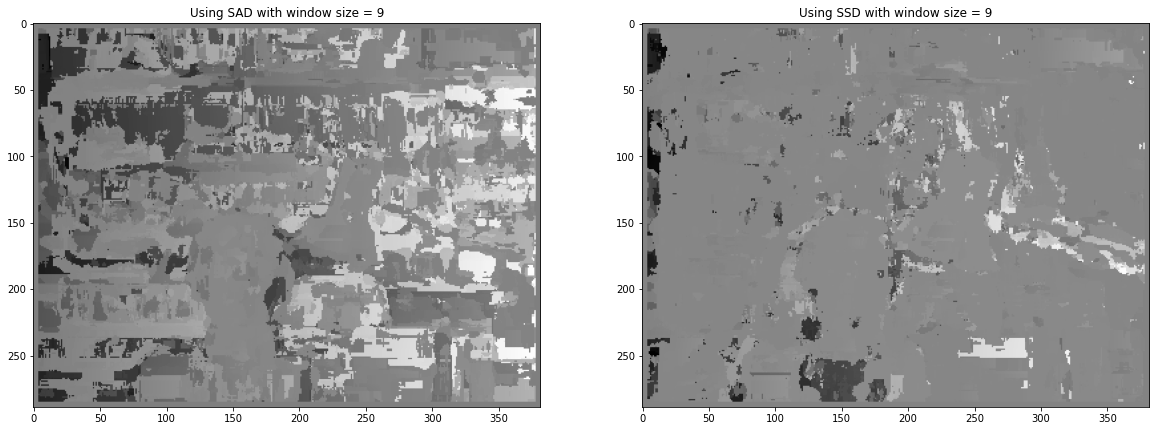

In [ ]:
k = [1,5,9]
for ki in k:
  sad,ssd = block_matching(img1,img2,k=ki)
  visualize_disparity_maps(sad,ssd,k=ki)

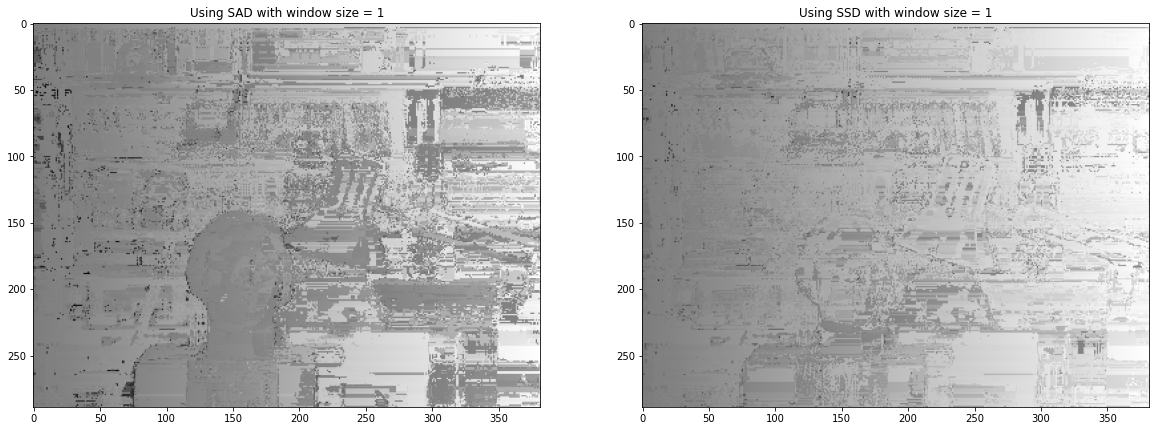

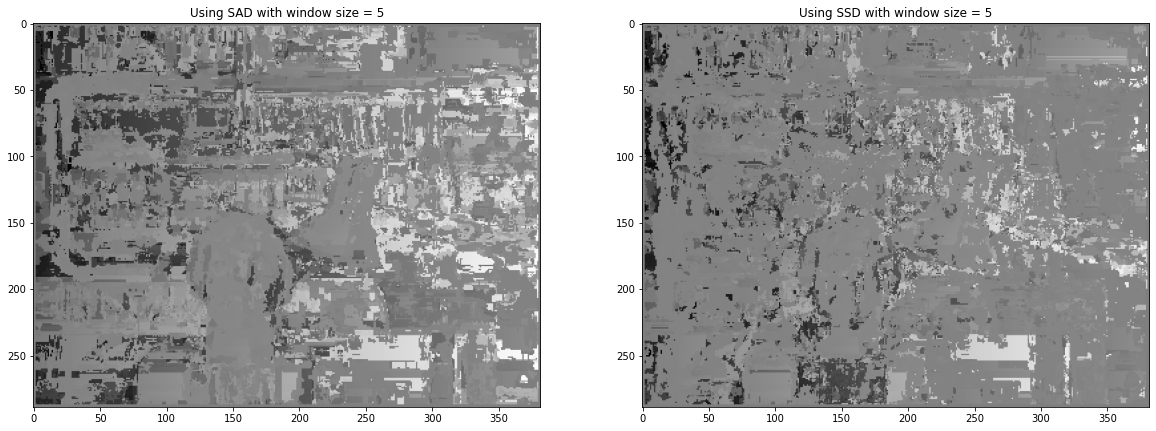

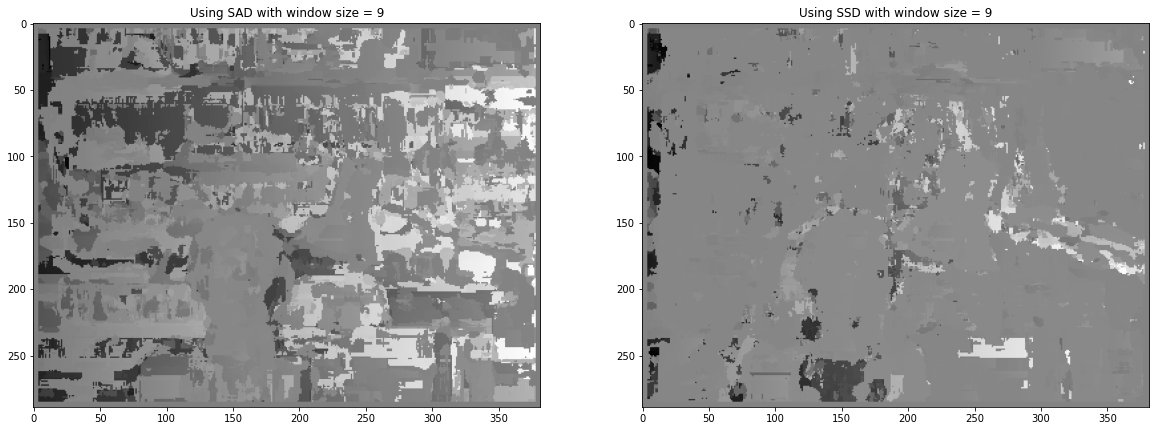

In [ ]:
k = [1,5,9]
for ki in k:
  sad,ssd = block_matching(img1,img2,k=ki)
  visualize_disparity_maps(sad,ssd,k=ki)

(375, 450)
(375, 450)


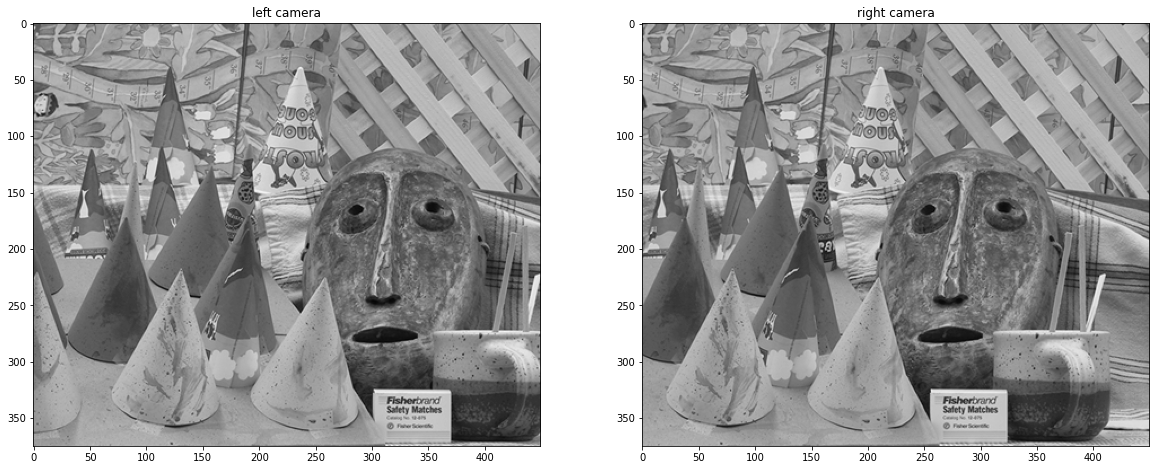

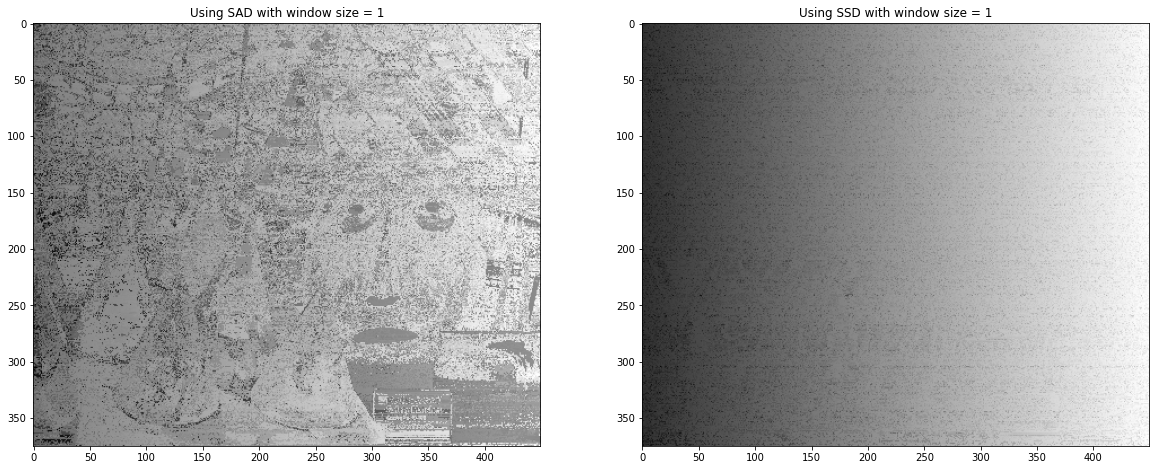

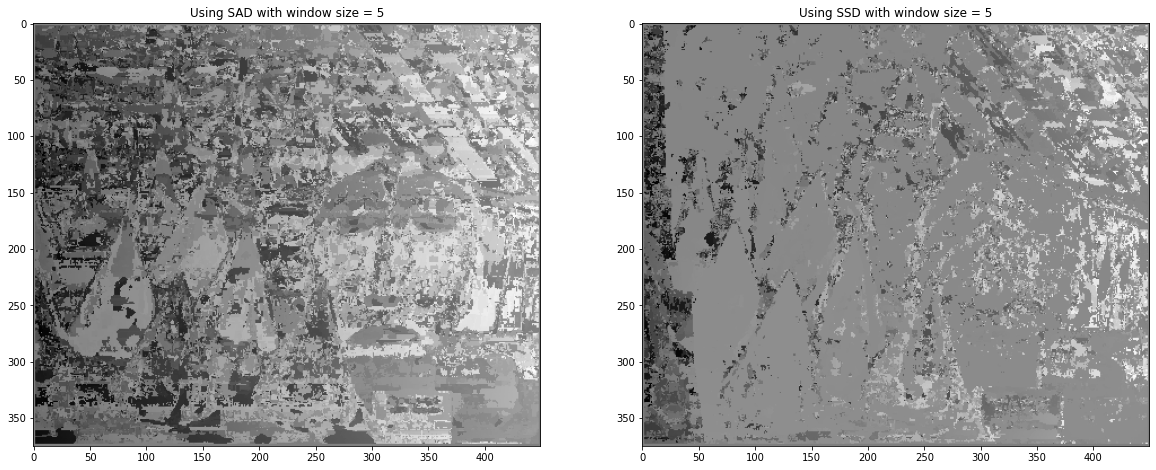

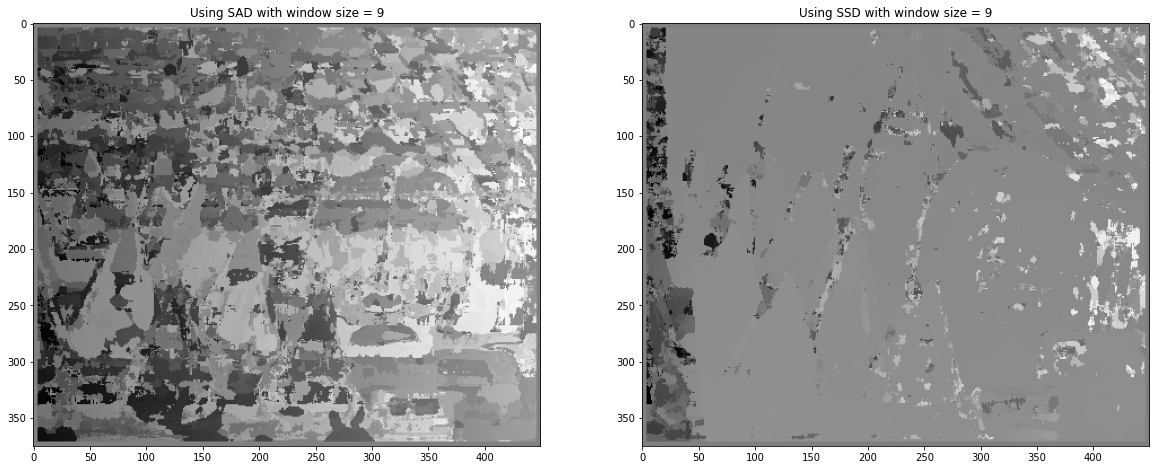

In [ ]:
img1 = cv2.imread("/content/l2.png",0)
img2 = cv2.imread("/content/r2.png",0)
print(img1.shape)
print(img2.shape)
display_scene(img1,img2)

k = [1,5,9]
for ki in k:
  sad,ssd = block_matching(img1,img2,k=ki)
  visualize_disparity_maps(sad,ssd,k=ki)

(375, 450)
(375, 450)


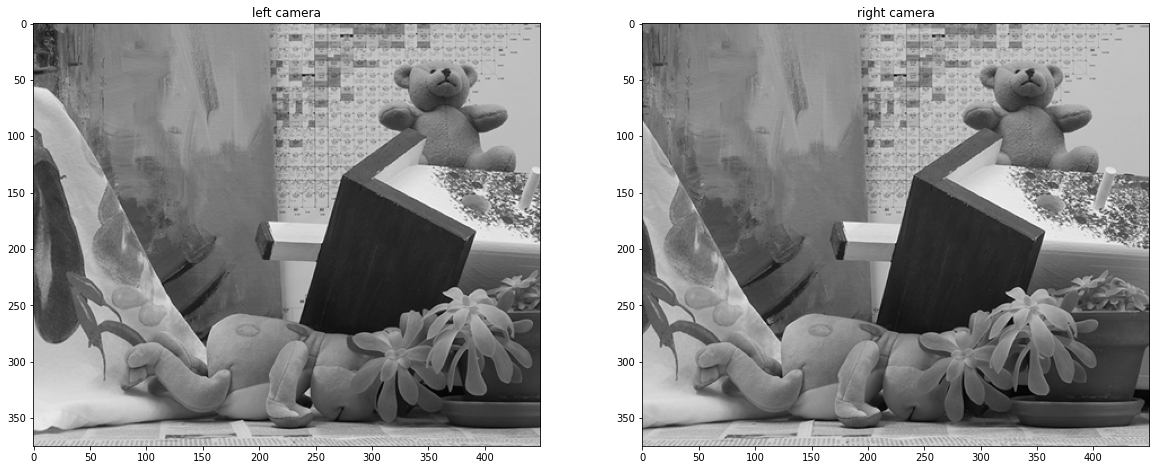

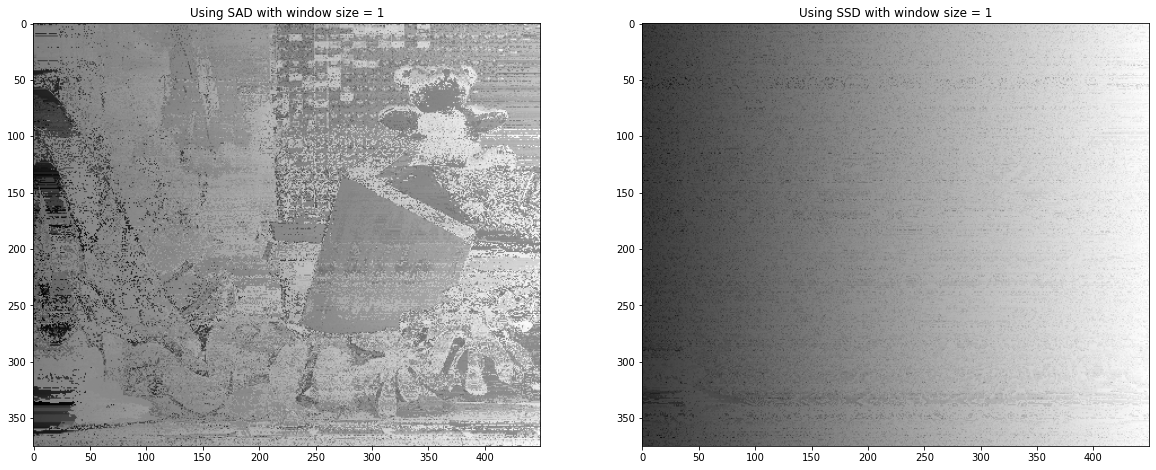

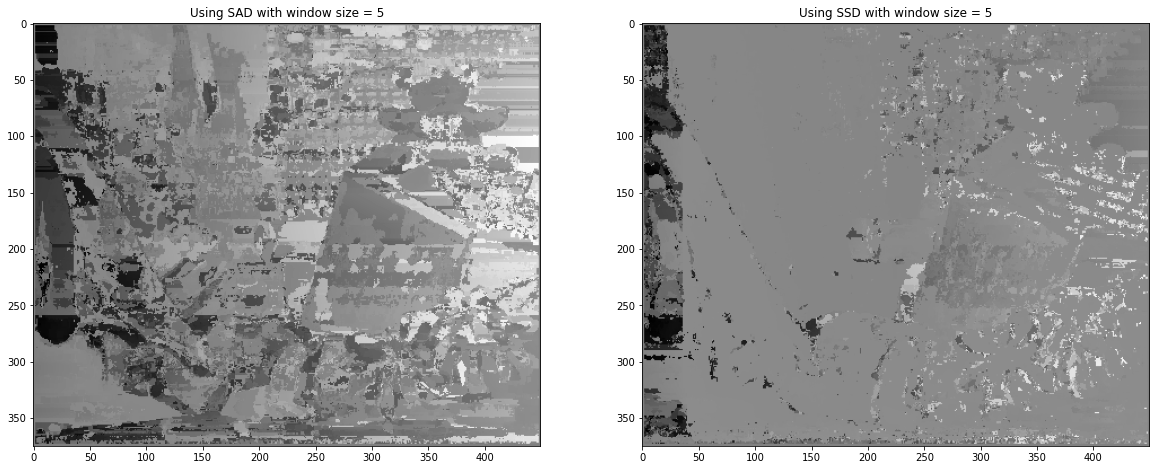

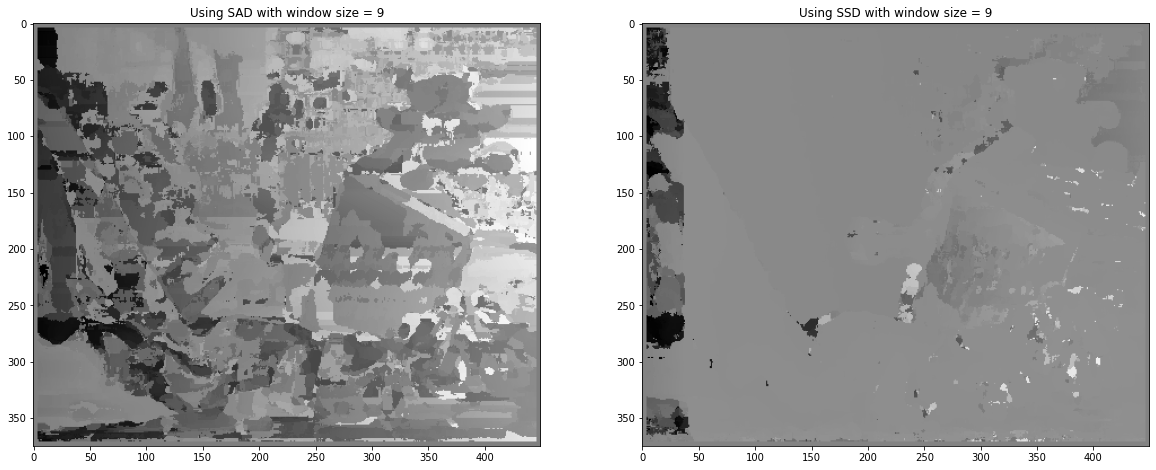

In [ ]:
img1 = cv2.imread("/content/l3.png",0)
img2 = cv2.imread("/content/r3.png",0)
print(img1.shape)
print(img2.shape)
display_scene(img1,img2)

k = [1,5,9]
for ki in k:
  sad,ssd = block_matching(img1,img2,k=ki)
  visualize_disparity_maps(sad,ssd,k=ki)